In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho padrão do CSV (pode ser sobrescrito ao chamar load_data)
RESULTS_PATH = 'results/TODOS_OS_RESULTADOS_CONSOLIDADOS.csv'

In [9]:


# 1. Carregar e preparar os dados
def load_data(path=RESULTS_PATH):
    df = pd.read_csv(path)
    # Garantir tipos corretos
    df['CENARIO'] = df['CENARIO'].astype(str)
    df['EXPERIMENTO_ID'] = df['EXPERIMENTO_ID'].astype(str)
    return df

# 2. Estatísticas descritivas por cenário
def describe_metrics(df):
    metrics = ['TOTAL_ELAPSED_TIME', 'EXECUTION_TIME', 'BYTES_SCANNED', 'ROWS_PRODUCED']
    desc = df.groupby('CENARIO')[metrics].describe()
    print("\n===== Estatísticas Descritivas por Cenário =====")
    #print(desc)
    return desc

# 3. Comparação entre normalizado e desnormalizado por experimento
def compare_scenarios(df):
    metrics = ['TOTAL_ELAPSED_TIME', 'EXECUTION_TIME', 'BYTES_SCANNED', 'ROWS_PRODUCED']
    print("\n===== Comparação Normalizado vs Desnormalizado por Experimento =====")
    grouped = df.groupby(['EXPERIMENTO_ID', 'CENARIO'])[metrics].mean().unstack()
    #print(grouped)
    return grouped

# 4. (Opcional) Gráficos comparativos
def plot_comparison(df, metric='TOTAL_ELAPSED_TIME'):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='EXPERIMENTO_ID', y=metric, hue='CENARIO', data=df)
    plt.title(f'Comparação de {metric} por Experimento e Cenário')
    plt.ylabel(metric)
    plt.xlabel('Experimento')
    plt.legend(title='Cenário')
    plt.tight_layout()
    plt.show()

df = load_data()

In [8]:
describe_metrics(df)


===== Estatísticas Descritivas por Cenário =====


TOTAL_ELAPSED_TIME                                      \
                            count          mean           std     min   
CENARIO                                                                 
desnormalizado              360.0    916.322222    315.309967   432.0   
normalizado                 360.0  23043.202778  20908.442197  1168.0   

                                                   EXECUTION_TIME  \
                    25%      50%      75%      max          count   
CENARIO                                                             
desnormalizado   673.50    781.5   1104.5   2642.0          360.0   
normalizado     1859.75  20169.0  43523.0  53113.0          360.0   

                              ... BYTES_SCANNED               ROWS_PRODUCED  \
                        mean  ...           75%           max         count   
CENARIO                       ...                                             
desnormalizado    515.272222  ...  4.782246e+07  4.924787e+07         360.0   
normalizado     22472.005556  ...  1.946658e+09  1.967085e+09         360.0   

                                                                             
                       mean          std  min   25%     50%     75%     max  
CENARIO                                                                      
desnormalizado  2749.333333  2734.994187  5.0  27.0  2662.0  5570.0  5570.0  
normalizado     2748.666667  2734.304798  5.0  27.0  2662.0  5568.0  5568.0  

[2 rows x 32 columns]

In [10]:
compare_scenarios(df)


===== Comparação Normalizado vs Desnormalizado por Experimento =====


TOTAL_ELAPSED_TIME               EXECUTION_TIME                \
CENARIO            desnormalizado   normalizado desnormalizado   normalizado   
EXPERIMENTO_ID                                                                 
E1                     971.600000  42507.883333     579.266667  41990.616667   
E2                     886.400000   1844.300000     473.700000   1402.800000   
E3                     714.066667   1668.883333     309.650000   1149.933333   
E4                    1106.483333  43134.883333     686.716667  42542.783333   
E5                     881.833333   3462.883333     488.416667   2902.016667   
E6                     937.550000  45640.383333     553.883333  44843.883333   

                BYTES_SCANNED                ROWS_PRODUCED              
CENARIO        desnormalizado   normalizado desnormalizado normalizado  
EXPERIMENTO_ID                                                          
E1               4.563629e+07  1.917556e+09         5297.0      5297.0  
E2               3.260982e+07  4.527715e+08           27.0        27.0  
E3               2.241619e+07  4.949635e+07            5.0         5.0  
E4               4.786397e+07  1.946658e+09         5570.0      5568.0  
E5               3.287169e+07  4.731989e+08           27.0        27.0  
E6               4.811055e+07  1.967085e+09         5570.0      5568.0

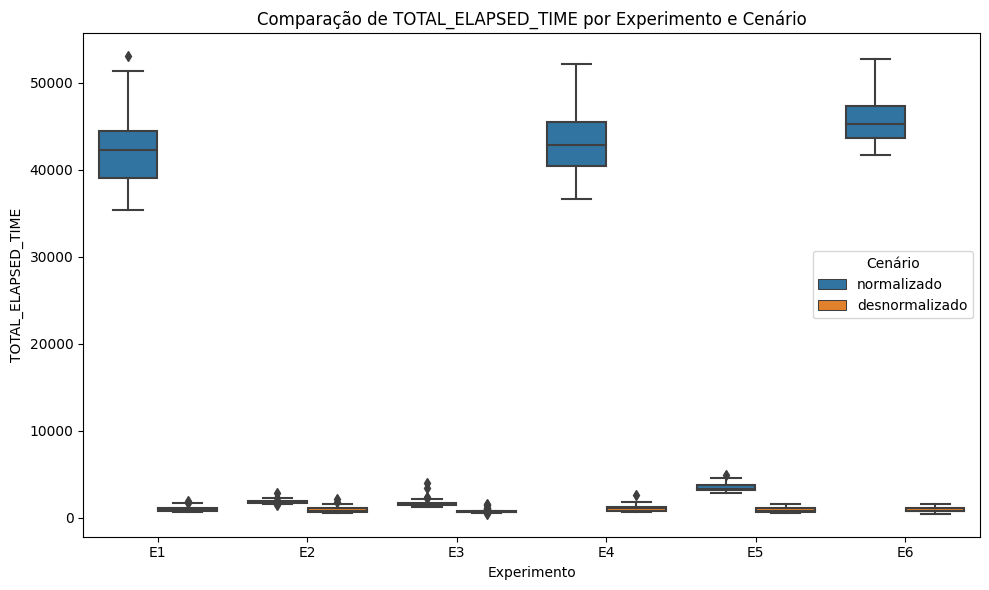

In [11]:
plot_comparison(df)